<a href="https://colab.research.google.com/github/adi907/ImageDeblurring/blob/main/BlindMotionDeblurring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip /content/drive/MyDrive/blindArchive.zip

Archive:  /content/drive/MyDrive/blindArchive.zip
   creating: blurred Faces Dataset/Angelina Jolie/
  inflating: blurred Faces Dataset/Angelina Jolie/001_fe3347c0.jpg  
  inflating: blurred Faces Dataset/Angelina Jolie/002_8f8da10e.jpg  
  inflating: blurred Faces Dataset/Angelina Jolie/003_57612506.jpg  
  inflating: blurred Faces Dataset/Angelina Jolie/004_f61e7d0c.jpg  
  inflating: blurred Faces Dataset/Angelina Jolie/005_582c121a.jpg  
  inflating: blurred Faces Dataset/Angelina Jolie/006_9135205d.jpg  
  inflating: blurred Faces Dataset/Angelina Jolie/007_cabbfcbb.jpg  
  inflating: blurred Faces Dataset/Angelina Jolie/008_d1f87068.jpg  
  inflating: blurred Faces Dataset/Angelina Jolie/009_fb3e6174.jpg  
  inflating: blurred Faces Dataset/Angelina Jolie/010_f99d79e3.jpg  
  inflating: blurred Faces Dataset/Angelina Jolie/011_7344ca35.jpg  
  inflating: blurred Faces Dataset/Angelina Jolie/012_cfcd4007.jpg  
  inflating: blurred Faces Dataset/Angelina Jolie/013_95ecbd39.jpg  
  

In [3]:
# Define function to blur the image (use fast fourier transform {see notes.pdf})

from scipy.fft import fft2
from scipy.fft import ifft2
from scipy.fft import fftshift
import numpy as np

def blur_filter(n,width=5):
    """
        n: dimensions of each side of the image
        width: Width of the out of focus filter
    
    Returns:
        G: Fourier transform of filter
    """

    x,y = np.mgrid[:n,:n]
    g = (x-n/2)**2 + (y-n/2)**2 < width**2
    g = g/np.sum(g)
    return fft2(fftshift(g)).real

def blur(f,G):
    """
        f: image to blur
        G: Filter 

    Returns:
        Blurred image
    """
    return ifft2(G*fft2(f)).real

In [4]:
import cv2
import os

input_path = '/content/Blurred Faces Dataset/'
output_path = '/content/Clear Faces Dataset/'

if not os.path.exists(output_path):
    os.makedirs(output_path)

In [8]:
for folder_name in os.listdir(input_path):
  inputF=input_path+'/'+folder_name
  outputF=output_path+'/'+folder_name
  if not os.path.exists(outputF):
    os.makedirs(outputF)
  for file_name in os.listdir(inputF):
    if file_name.endswith('.jpg') or file_name.endswith('.png'):  # check if the file is an image file

        # Read the image
        image = cv2.imread(os.path.join(inputF, file_name))

        # Get the filter
        # Predict using BLIND DECONVOLUTION
        
        # Deblur the image
        # Use TV regularization, Wienter filtering or Richardson-lucy Deconvolution


        # Write the blurred image to the output folder
        output_file_path = os.path.join(outputF, file_name)
        # cv2.imwrite(output_file_path, img_deblurred)

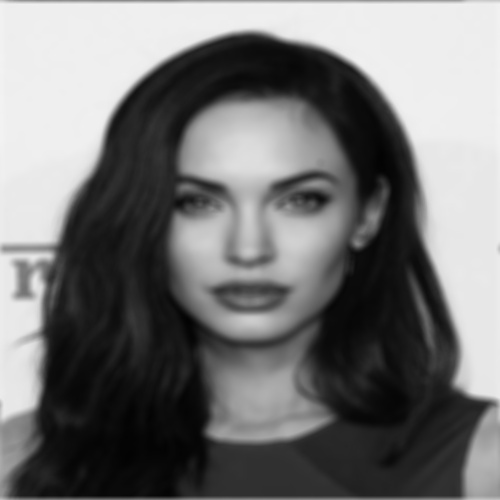

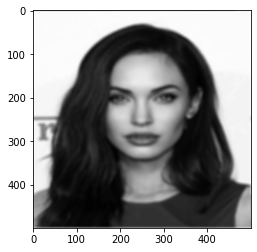

In [7]:
# Display a Deblurred image

from PIL import Image
import requests
from io import BytesIO

import matplotlib.pyplot as plt

image='/content/Clear Faces Dataset/Kate Winslet/001_5992faf7.jpg'

imgInit=Image.open(image)
imgInit.show()

Blurred image dimensions:  (500, 500)


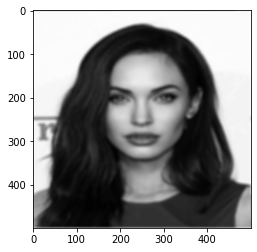

In [10]:
# Clear Image details
plt.imshow(imgInit,cmap='gray')
print('Blurred image dimensions: ',imgInit.size)

In [5]:
'''
Tasks left:-
0) Figure out TV regularization for Non-blind

1. Predict blur filter using Blind deconvolution
2. Deblur image using TV , Weiner etc.
3. Evaluate clear image on metrics like SSIM etc

4. Try to keep color intact (by applying blurring on different channels separately and combining results)

'''



1
